In [1]:
import pandas as pd
import numpy as np
import sys
import os

utils_path = os.path.abspath('../dataset/PopulationStatistics')
if utils_path not in sys.path:
    sys.path.append(utils_path)

from utils import *

In [2]:
file_path = '../dataset/PopulationStatistics/202212_202412_연령별인구현황_연간.csv'
origin_df = pd.read_csv(file_path, encoding = 'cp949')

In [3]:
# origin_df : 원본 데이터셋
# df : 전처리 데이터셋
df = preprocess_df(origin_df)


In [4]:
df

,행정구역,연도,성별,연령대,인구수
0,서울특별시 (1100000000),2022,전체,0~4세,227566
1,서울특별시 (1100000000),2022,전체,5~9세,317214
2,서울특별시 (1100000000),2022,전체,10~14세,361546
3,서울특별시 (1100000000),2022,전체,15~19세,385373
4,서울특별시 (1100000000),2022,전체,20~24세,576263
...,...,...,...,...,...
55183,제주특별자치도 서귀포시 (5013000000),2024,여,80~84세,3526
55184,제주특별자치도 서귀포시 (5013000000),2024,여,85~89세,2471
55185,제주특별자치도 서귀포시 (5013000000),2024,여,90~94세,1223
55186,제주특별자치도 서귀포시 (5013000000),2024,여,95~99세,256


In [5]:
# 소멸위험지수 계산 
decline_df = decline_index(df)



In [6]:
decline_df

,행정구역,연도,20~39세_여성,65세_이상_전체,지방소멸지수
0,강원도 (4200000000),2022,149573,698136,0.214246
1,강원도 강릉시 (4215000000),2022,20298,98942,0.205150
2,강원도 고성군 (4282000000),2022,1945,16996,0.114439
3,강원도 동해시 (4217000000),2022,7521,39840,0.188780
4,강원도 삼척시 (4223000000),2022,5279,34888,0.151313
...,...,...,...,...,...
871,충청북도 청주시 흥덕구 (4311300000),2023,37476,71626,0.523218
872,충청북도 청주시 흥덕구 (4311300000),2024,39082,77548,0.503972
873,충청북도 충주시 (4313000000),2022,19580,91812,0.213262
874,충청북도 충주시 (4313000000),2023,19156,95934,0.199679


In [7]:
# 소멸위험지수 일부 추출
# n : 지역수
# thresh : 수치 - 해당 수치 이하인 경우 다 출력
decline_stat_df1 = get_low_extinction_regions(decline_df, n=10)
decline_stat_df2 = get_low_extinction_regions(decline_df, thresh=0.2)

In [8]:
decline_stat_df1

,행정구역,연도,20~39세_여성,65세_이상_전체,지방소멸지수,소멸위험순위
0,대구광역시 군위군 (2772000000),2024,851,21240,0.040066,1
1,대구광역시 군위군 (2772000000),2023,926,20600,0.044951,1
2,경상북도 봉화군 (4792000000),2024,1128,25076,0.044983,2
3,경상북도 봉화군 (4792000000),2023,1263,24402,0.051758,2
4,경상북도 봉화군 (4792000000),2022,1367,23894,0.057211,2
5,경상북도 의성군 (4773000000),2024,2084,46154,0.045153,3
6,경상북도 의성군 (4773000000),2023,2307,45364,0.050855,3
7,경상북도 의성군 (4773000000),2022,2396,44352,0.054022,3
8,경상남도 합천군 (4889000000),2024,1740,36226,0.048032,4
9,경상남도 합천군 (4889000000),2023,1849,35668,0.051839,4


In [9]:
decline_stat_df2

,행정구역,연도,20~39세_여성,65세_이상_전체,지방소멸지수,소멸위험순위
0,대구광역시 군위군 (2772000000),2024,851,21240,0.040066,1
1,대구광역시 군위군 (2772000000),2023,926,20600,0.044951,1
2,경상북도 봉화군 (4792000000),2024,1128,25076,0.044983,2
3,경상북도 봉화군 (4792000000),2023,1263,24402,0.051758,2
4,경상북도 봉화군 (4792000000),2022,1367,23894,0.057211,2
...,...,...,...,...,...,...
317,충청남도 당진시 (4427000000),2023,14761,70418,0.209620,121
318,충청남도 당진시 (4427000000),2022,15180,67716,0.224172,121
319,경상북도 포항시 (4711000000),2024,43884,220270,0.199228,122
320,경상북도 포항시 (4711000000),2023,45188,207684,0.217581,122


In [10]:
# 시각화
fig = plot_extinction_trend(decline_stat_df1, title='decline_index_trend', save = True)
fig.show()


✅ 그래프가 HTML로 저장되었습니다: ./plot/decline_index_trend.html


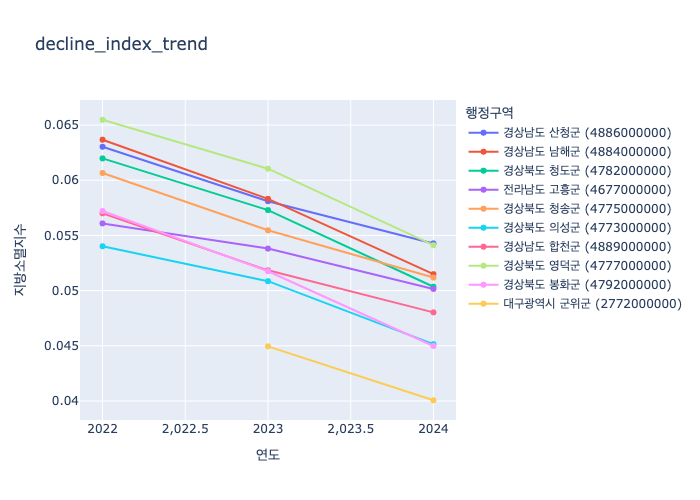

In [11]:

# png 출력용 - 깃에서 보기위함
pio.show(fig, renderer="png")

In [12]:
decline_stat_df2.head(10)

,행정구역,연도,20~39세_여성,65세_이상_전체,지방소멸지수,소멸위험순위
0,대구광역시 군위군 (2772000000),2024,851,21240,0.040066,1
1,대구광역시 군위군 (2772000000),2023,926,20600,0.044951,1
2,경상북도 봉화군 (4792000000),2024,1128,25076,0.044983,2
3,경상북도 봉화군 (4792000000),2023,1263,24402,0.051758,2
4,경상북도 봉화군 (4792000000),2022,1367,23894,0.057211,2
5,경상북도 의성군 (4773000000),2024,2084,46154,0.045153,3
6,경상북도 의성군 (4773000000),2023,2307,45364,0.050855,3
7,경상북도 의성군 (4773000000),2022,2396,44352,0.054022,3
8,경상남도 합천군 (4889000000),2024,1740,36226,0.048032,4
9,경상남도 합천군 (4889000000),2023,1849,35668,0.051839,4


In [13]:
region_list = [
    '동두천시', '통영시', '제천시', '공주시', '함안군', '해남군', '남원시', '광주시', '양주시', '용인시',
    '파주시', '화성시', '경산시', '포항시', '김해시', '진주시', '순천시'

]
for region_ in region_list:
    temp_df = decline_stat_df2[decline_stat_df2['행정구역'].str.contains(region_)]
    decline_value = temp_df[temp_df['연도']==2024]['지방소멸지수'].to_numpy()
    print(f"{region_}, {temp_df['소멸위험순위'].unique()} - {np.round(decline_value, 4)}")
    

    

동두천시, [104] - [0.1789]
통영시, [82] - [0.1381]
제천시, [91] - [0.1559]
공주시, [83] - [0.1402]
함안군, [55] - [0.0924]
해남군, [39] - [0.0762]
남원시, [68] - [0.1068]
광주시, [] - []
양주시, [] - []
용인시, [] - []
파주시, [] - []
화성시, [] - []
경산시, [] - []
포항시, [106 122] - [0.1837 0.1992]
김해시, [] - []
진주시, [] - []
순천시, [] - []
